In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from scipy.sparse import hstack
import shap
import os


In [4]:
# Load Historical data
current_dir = os.getcwd()
historical_data_path = os.path.join(current_dir, "../data/MachineLearningRating_v3/MachineLearningRating_v3.txt")
df = pd.read_csv(historical_data_path, sep='|')
print("data describe",df.describe())
print("data info", df.info())
print("data datatypes", df.dtypes)
print("columns", df.columns)

C:\Users\hp\AppData\Local\Temp\ipykernel_21364\3797526804.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(historical_data_path, sep='|')


data describe        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.00

In [5]:
# Assessing missing values
print(df.isnull().sum())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

## Univariate Analysis
### Histograms for Numerical Variables

In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns: ", numeric_columns)

Numeric Columns:  Index(['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode',
       'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts',
       'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet',
       'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [5]:
visualizations_dir = os.path.join(current_dir, 'visualizations')
os.makedirs(visualizations_dir, exist_ok=True)



# Sample DataFrame
numeric_columns = ['Cylinders', 'cubiccapacity', 'kilowatts',
                   'CustomValueEstimate', 'SumInsured', 'CalculatedPremiumPerTerm',
                   'TotalPremium', 'TotalClaims']
# df = pd.DataFrame()  # Replace with your actual DataFrame

print("data columns:", df.columns)
# Plot histograms for selected columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=30, color="blue")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    #Save the histogram
    file_path = os.path.join(visualizations_dir, f'histogram_{column}.png')
    plt.savefig(file_path, dpi=300, bbox_inches='tight')  # Save the histogram
    plt.close()


    print(f"Histogram saved at: {file_path}")

data columns: Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')
Histogram saved at: c:\Users\hp\Desktop\Academic_Folders\Kifiya AI Mast

### Bar Chart for Categorical Variables

In [7]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non Numeric Columns: ", non_numeric_columns)

Non Numeric Columns:  Index(['TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType',
       'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender',
       'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType',
       'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate',
       'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding',
       'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder',
       'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType',
       'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType'],
      dtype='object')


In [44]:
def plot_bar_chart(df, column):
    value_counts = df[column].value_counts()
    plt.figure(figsize=(10,6))
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequemcy', fontsize=14)
    plt.xticks(rotation=45)
    # plt.tight_layout()
    # plt.show()
    #Save the histogram
    file_path = os.path.join(visualizations_dir, f'bar_graph_{column}.png')
    plt.savefig(file_path, dpi=300, bbox_inches='tight')  # Save the histogram
    plt.close()


# Plot bar charts for recommended columns
categorical_columns = [
    'IsVATRegistered', 'Citizenship', 'LegalType', 'Language', 'MaritalStatus',
    'Gender', 'Country', 'Province', 'ItemType', 'VehicleType', 'make', 'Model',
    'AlarmImmobiliser', 'TrackingDevice', 'CoverCategory', 'CoverType',
    'CoverGroup', 'Product', 'StatutoryClass', 'StatutoryRiskType'
]

for col in categorical_columns:
    plot_bar_chart(df, col)

## Bivariate/Multivariate Analysis

### Correlation Matrix

Correlation:                            Cylinders  cubiccapacity  kilowatts  \
Cylinders                  1.000000       0.301620   0.325936   
cubiccapacity              0.301620       1.000000   0.566559   
kilowatts                  0.325936       0.566559   1.000000   
CustomValueEstimate        0.018561       0.046180   0.035497   
SumInsured                 0.001635      -0.002233  -0.002167   
CalculatedPremiumPerTerm   0.017942       0.038396   0.039054   
TotalPremium               0.006826       0.042554   0.035024   
TotalClaims                0.000043       0.001228   0.003099   

                          CustomValueEstimate  SumInsured  \
Cylinders                            0.018561    0.001635   
cubiccapacity                        0.046180   -0.002233   
kilowatts                            0.035497   -0.002167   
CustomValueEstimate                  1.000000   -0.000213   
SumInsured                          -0.000213    1.000000   
CalculatedPremiumPerTerm          

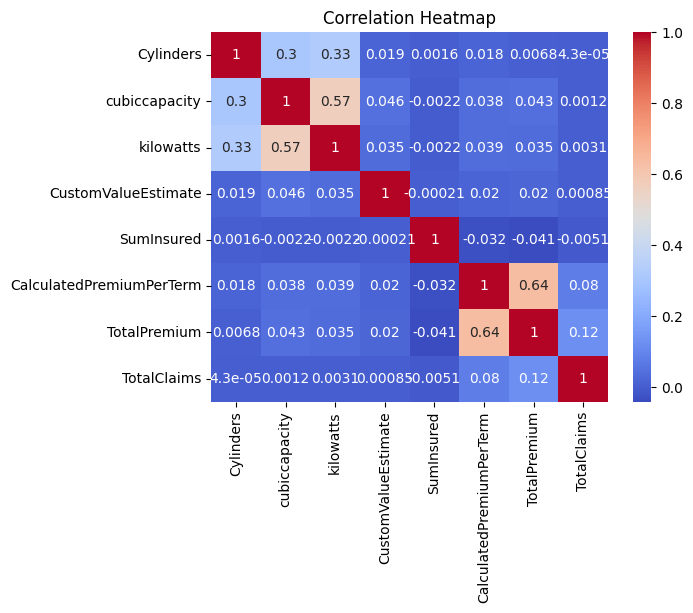

In [51]:


correlation = df[numeric_columns].corr()
print("Correlation: ", correlation)
sns.heatmap(correlation, annot=True, cmap= 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Scatter Plots

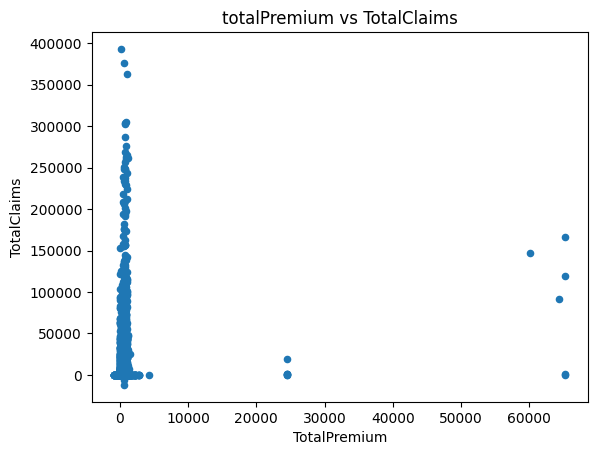

In [17]:
df.plot.scatter(x='TotalPremium', y='TotalClaims')
plt.title('totalPremium vs TotalClaims')
plt.show()

### Trends Over Geography

Province Province
Eastern Cape     70.546672
Free State       64.373780
Gauteng          61.071115
KwaZulu-Natal    77.800695
Limpopo          61.899038
Name: TotalPremium, dtype: float64


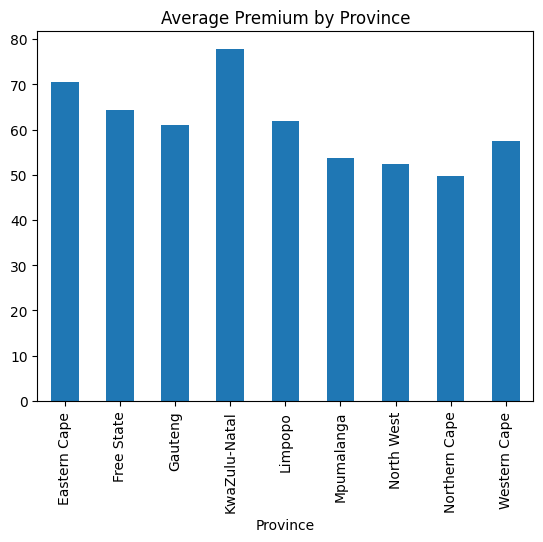

In [48]:
province_trends = df.groupby('Province')['TotalPremium'].mean()
print("Province", province_trends.head())
province_trends.plot(kind='bar')
plt.title('Average Premium by Province')
plt.show()

## Outlier Detection
### Boxplots

outlier detection 0     21.929825
1     21.929825
2      0.000000
3    512.848070
4      0.000000
Name: TotalPremium, dtype: float64


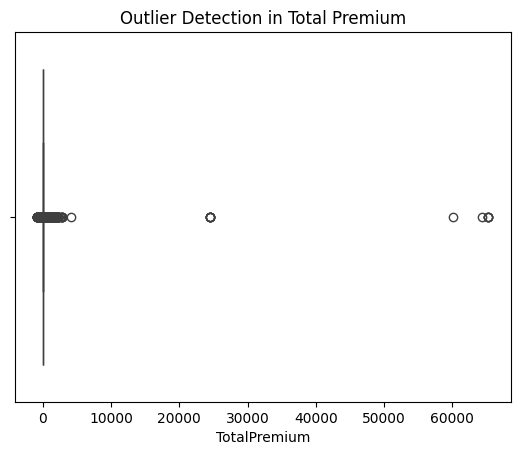

In [50]:
sns.boxplot(x=df['TotalPremium'])
print("outlier detection", df['TotalPremium'].head())
plt.title('Outlier Detection in Total Premium')
plt.show()

### 2. Hypothesis Testing Code
#### a. Risk Differences Across Provinces
##### Compare TotalClaims across provinces using a t-test

In [14]:
# Group data by province
province_data = df[['Province', 'TotalClaims']].dropna()

# Perform t-test for two selected provinces
province1 = province_data[province_data['Province'] == 'Province_A']['TotalClaims']
province2 = province_data[province_data['Province'] == 'Province_B']['TotalClaims']

t_stat, p_value = ttest_ind(province1, province2)

# Results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Risk differs across provinces.")
else:
    print("Fail to reject the null hypothesis: No significant risk differences across provinces.")


T-statistic: nan, P-value: nan
Fail to reject the null hypothesis: No significant risk differences across provinces.


C:\Users\hp\AppData\Local\Temp\ipykernel_21364\835862484.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(province1, province2)


#### b. Risk Differences Across Zip Codes
##### Follow a similar approach with zip codes

In [9]:
# Group data by zip code
zipcode_data = df[['PostalCode', 'TotalClaims']].dropna()

# Select two zip codes for comparison
zip1 = zipcode_data[zipcode_data['PostalCode'] == 'Zip_A']['TotalClaims']
zip2 = zipcode_data[zipcode_data['PostalCode'] == 'Zip_B']['TotalClaims']

t_stat, p_value = ttest_ind(zip1, zip2)

# Results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Risk differs across zip codes.")
else:
    print("Fail to reject the null hypothesis: No significant risk differences across zip codes.")


T-statistic: nan, P-value: nan
Fail to reject the null hypothesis: No significant risk differences across zip codes.


C:\Users\hp\AppData\Local\Temp\ipykernel_21364\1220647926.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(zip1, zip2)


#### c. Margin Differences Across Zip Codes
##### Compare profit margins.

In [10]:
# Calculate margin
df['Margin'] = (df['TotalPremium'] - df['TotalClaims']) / df['TotalPremium']

# Group by zip code
margin_zip1 = df[df['PostalCode'] == 'Zip_A']['Margin']
margin_zip2 = df[df['PostalCode'] == 'Zip_B']['Margin']

t_stat, p_value = ttest_ind(margin_zip1, margin_zip2)

# Results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant margin differences across zip codes.")
else:
    print("Fail to reject the null hypothesis: No significant margin differences across zip codes.")


T-statistic: nan, P-value: nan
Fail to reject the null hypothesis: No significant margin differences across zip codes.


C:\Users\hp\AppData\Local\Temp\ipykernel_21364\3475538433.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(margin_zip1, margin_zip2)


#### d. Risk Differences Between Women and Men 

##### Use a t-test for gender-based risk analysis.

In [12]:
# Gender risk comparison
female_risk = df[df['Gender'] == 'Female']['TotalClaims']
male_risk = df[df['Gender'] == 'Male']['TotalClaims']

t_stat, p_value = ttest_ind(female_risk, male_risk)

# Results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant risk differences between women and men.")
else:
    print("Fail to reject the null hypothesis: No significant risk differences between women and men.")


T-statistic: 0.24803623812388725, P-value: 0.8041073961270343
Fail to reject the null hypothesis: No significant risk differences between women and men.


### Task 4: Statistical Modeling

#### 1. Data Preparation

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix, hstack
import pandas as pd

# Step 1: Fill missing values
# Handling missing values and date extraction if needed
if 'TransactionMonth' in df.columns:
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    df['TransactionMonth_Year'] = df['TransactionMonth'].dt.year
    df['TransactionMonth_Month'] = df['TransactionMonth'].dt.month
    df['TransactionMonth_Day'] = df['TransactionMonth'].dt.day
    df.drop(columns=['TransactionMonth'], inplace=True)

# Replace empty strings or spaces with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Fill missing numeric columns with the median
numeric_columns = df.select_dtypes(include=["number"]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Fill missing non-numeric columns with "Unknown"
non_numeric_columns = df.select_dtypes(exclude=["number"]).columns
df[non_numeric_columns] = df[non_numeric_columns].fillna("Unknown")

# Confirm no missing values
print("Missing values per column:\n", df.isnull().sum())

# Confirm no missing values
print("Missing values per column:\n", df.isnull().sum())

# Step 2: Feature Engineering
df['CarAge'] = 2024 - df['RegistrationYear']

# Step 3: Split data before encoding
X = df.drop(columns=['TotalClaims'])  # Features
y = df['TotalClaims']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Encode categorical data with OneHotEncoder
categorical_columns = ['Province', 'PostalCode', 'Gender', 'VehicleType']

# Update encoder with `handle_unknown='ignore'` to avoid issues with new categories in the test data
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')

# Fit on the training dataset
encoded_train = encoder.fit_transform(X_train[categorical_columns])

# Transform the test dataset
encoded_test = encoder.transform(X_test[categorical_columns])

# Convert numerical columns to sparse format
numerical_columns = ['CarAge', 'cubiccapacity', 'kilowatts', 'TotalPremium']
X_train_numerical_sparse = csr_matrix(X_train[numerical_columns].values)
X_test_numerical_sparse = csr_matrix(X_test[numerical_columns].values)

# Combine encoded categorical and numerical features (both in sparse format)
X_train_combined = hstack((X_train_numerical_sparse, encoded_train))
X_test_combined = hstack((X_test_numerical_sparse, encoded_test))

# Step 6: Dimensionality Reduction with PCA
pca = PCA(n_components=40, random_state=42)  # Adjust `n_components` as needed
X_train_reduced = pca.fit_transform(X_train_combined.toarray())
X_test_reduced = pca.transform(X_test_combined.toarray())

print("Data ready for modeling!")

Missing values per column:
 UnderwrittenCoverID               0
PolicyID                          0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoors                     0


### 2. Model Building

#### a. Linear Regression

In [12]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_reduced, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_reduced)

# Evaluate
print(f"Linear Regression R²: {r2_score(y_test, y_pred_lr)}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}")



Linear Regression R²: 0.014114404744399955
Linear Regression MSE: 5336598.981155393


#### b. Random Forest

In [13]:
# Train Random Forest
rf = RandomForestRegressor(n_estimators=40, random_state=42)
rf.fit(X_train_reduced, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_reduced)

# Evaluate
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf)}")
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")


Random Forest R²: -0.19604650523997313
Random Forest MSE: 6474200.041053752


#### c. XGBoost

In [14]:
# Train XGBoost
xgb = XGBRegressor(n_estimators=40, learning_rate=0.1, random_state=42)
xgb.fit(X_train_reduced, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test_reduced)

# Evaluate
print(f"XGBoost R²: {r2_score(y_test, y_pred_xgb)}")
print(f"XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb)}")


XGBoost R²: -0.016007430842630566
XGBoost MSE: 5499648.484949595


### 3. Feature Importance with SHAP

In [ ]:
X_test_sample = pd.DataFrame(X_test_reduced).sample(n=1000, random_state=42).values

# Explain the model
explainer = shap.TreeExplainer(rf)
shap_values_sample = explainer(X_test_combined[:1000], check_additivity=False)

# Visualize SHAP for the sample
feature_names = numerical_columns + list(encoder.get_feature_names_out(categorical_columns))
shap.summary_plot(shap_values_sample, features=X_test_combined[:1000].toarray(), feature_names=feature_names)

NameError: name 'pd' is not defined